In [6]:
import torch
import numpy as np
import random
from sctfbridge.model import scTFBridge
import scanpy as sc

def set_seed(seed):
    import os
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    # torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.set_float32_matmul_precision('high')


set_seed(3407)

In [7]:
import anndata
dataset_name = 'human_PBMC'
cell_key = 'cell_type'
batch_key = ''


gex_adata = anndata.read_h5ad(f'filter_data/{dataset_name}/RNA_filter.h5ad')
atac_adata = anndata.read_h5ad(f'filter_data/{dataset_name}/ATAC_filter.h5ad')
TF_adata = anndata.read_h5ad(f'filter_data/{dataset_name}/TF_filter.h5ad')
mask_path = f'filter_data/{dataset_name}/TF_binding/TF_binding.txt'

In [8]:
new_model = scTFBridge.load('sctfbridge_model', device=torch.device('cuda:7'))


🚀 Loading model from sctfbridge_model...
  - Using device: cuda:7
✅ Model loaded and ready for inference.


In [9]:
output_embedding = new_model.get_embeddings([gex_adata, atac_adata, TF_adata], device=torch.device('cuda:6'))


✨ Extracting latent embeddings from the model...
  - Using device: cuda:6


100%|██████████| 76/76 [00:04<00:00, 18.27batch/s]


✅ Embeddings extracted successfully. Returning a dictionary of representations.


In [15]:
gex_adata.obsm['rna_private'] = output_embedding['RNA_private_representations']
gex_adata.obsm['joint_share'] = output_embedding['joint_share_representations']
atac_adata.obsm['atac_private'] = output_embedding['ATAC_private_representations']

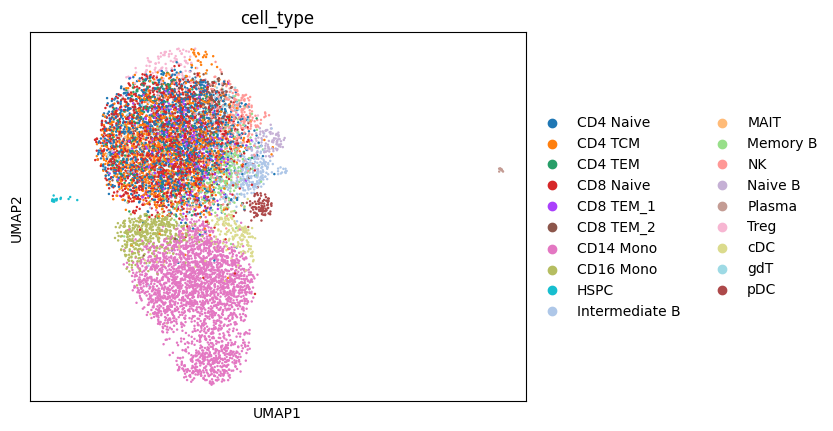

In [11]:
sc.pp.neighbors(gex_adata, use_rep='rna_private')
sc.tl.umap(gex_adata)
sc.pl.umap(gex_adata,
           color=['cell_type'])

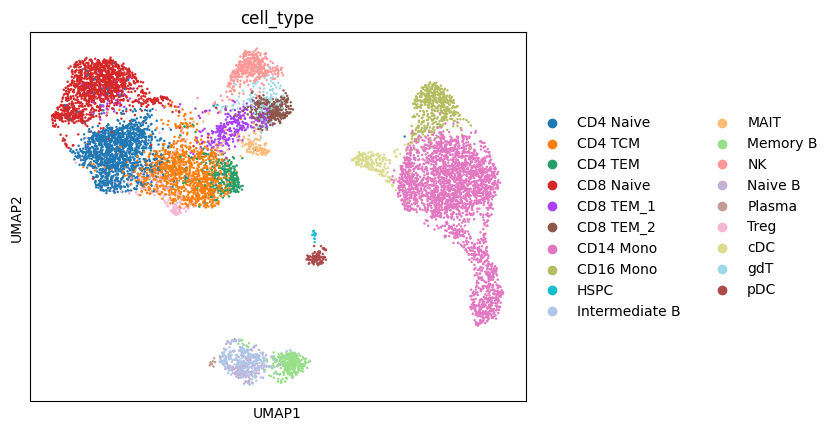

In [14]:
sc.pp.neighbors(gex_adata, use_rep='joint_share')
sc.tl.umap(gex_adata)
sc.pl.umap(gex_adata,
           color=['cell_type'])

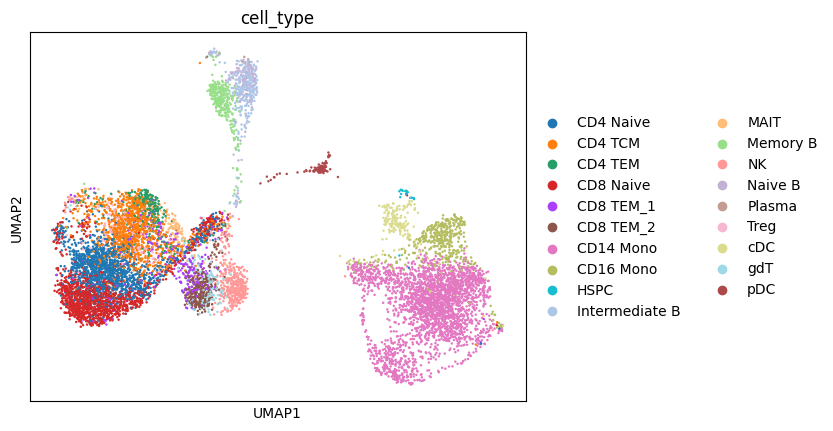

In [16]:
sc.pp.neighbors(atac_adata, use_rep='atac_private')
sc.tl.umap(atac_adata)
sc.pl.umap(atac_adata,
           color=['cell_type'])